In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:

#url = "http://api.openweathermap.org/data/2.5/weather"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. Skipping...")


Processing record 1|rikitea
Processing record 2|dalhousie
Processing record 3|punta arenas
Processing record 4|mount gambier
Processing record 5|port alfred
Processing record 6|alamosa
Processing record 7|turangi
Processing record 8|kapaa
Processing record 9|chandbali
Processing record 10|isla vista
Processing record 11|mouila
City not found. Skipping...
Processing record 12|cape town
Processing record 13|katsuura
Processing record 14|khatanga
Processing record 15|busselton
Processing record 16|thompson
Processing record 17|sabha
Processing record 18|upernavik
City not found. Skipping...
Processing record 19|new norfolk
Processing record 20|saskylakh
Processing record 21|tuktoyaktuk
Processing record 22|pangai
Processing record 23|puerto ayora
Processing record 24|castro
City not found. Skipping...
Processing record 25|saldanha
Processing record 26|chara
Processing record 27|mar del plata
Processing record 28|kavieng
Processing record 29|provideniya
Processing record 30|newport
Process

Processing record 244|cap malheureux
Processing record 245|kuminskiy
Processing record 246|goderich
City not found. Skipping...
Processing record 247|ribeira grande
Processing record 248|tolaga bay
Processing record 249|hasaki
Processing record 250|padang
Processing record 251|saint-augustin
Processing record 252|chimala
Processing record 253|kinablangan
City not found. Skipping...
Processing record 254|carpinteria
Processing record 255|lata
Processing record 256|buraydah
Processing record 257|port elizabeth
Processing record 258|maldonado
Processing record 259|ancona
Processing record 260|kaeo
Processing record 261|kislovodsk
Processing record 262|shelopugino
Processing record 263|muzhi
Processing record 264|lompoc
Processing record 265|agaro
Processing record 266|aklavik
Processing record 267|bilibino
Processing record 268|victoria
Processing record 269|beloha
Processing record 270|chervone
Processing record 271|springbok
Processing record 272|dinga
Processing record 273|lewisville
P

Processing record 488|bethanien
Processing record 489|santa rosa
Processing record 490|gillette
Processing record 491|sorong
Processing record 492|fort nelson
City not found. Skipping...
Processing record 493|tommot
Processing record 494|ucluelet
Processing record 495|leua
Processing record 496|elliot lake
Processing record 497|rivers
Processing record 498|bandarbeyla
Processing record 499|avera
Processing record 500|huesca
Processing record 501|robertsport
Processing record 502|barranca
City not found. Skipping...
Processing record 503|inhambane
Processing record 504|urumqi
Processing record 505|ust-barguzin
Processing record 506|cayenne
Processing record 507|esna
Processing record 508|caravelas
Processing record 509|vyritsa
Processing record 510|biltine
Processing record 511|mae sai
Processing record 512|ketchikan
Processing record 513|pisco
Processing record 514|ilanskiy
Processing record 515|dhanera
Processing record 516|labuhan
Processing record 517|owensboro
City not found. Skipp

In [5]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Humidity":humidity,
                        "Cloudiness":cloudiness, 
                        "Wind Speed":wind_speed})

#Exporting data to csv

#Displaying dataframe
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,-23.1203,-134.9692,78.80,77,88,20.67
1,Dalhousie,32.5333,75.9833,52.30,55,99,10.56
2,Punta Arenas,-53.1500,-70.9167,42.80,93,90,6.91
3,Mount Gambier,-37.8333,140.7667,57.20,51,100,10.36
4,Port Alfred,-33.5906,26.8910,60.78,82,35,14.58


In [6]:
#Discribe data frame
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,20.565452,22.070967,61.538559,70.395431,52.940246,7.347856
std,32.974472,87.432505,18.849355,22.340831,37.922641,5.247700
min,-54.800000,-175.200000,5.130000,4.000000,0.000000,0.160000
25%,-4.085000,-52.333300,48.200000,58.000000,17.000000,3.440000
50%,25.291900,26.083300,64.400000,76.000000,56.000000,5.750000
75%,47.666600,93.450000,78.010000,87.000000,90.000000,10.360000
max,78.218600,178.416700,98.490000,100.000000,100.000000,28.770000


In [7]:
city_humidity = city_df.loc[city_df["Humidity"] >100, [
    "City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


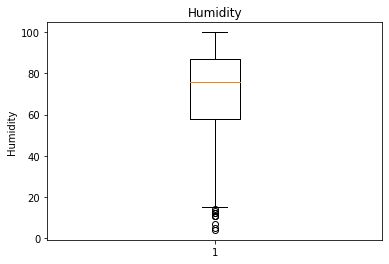

In [9]:
city_humidity_df =city_df['Humidity']

fig1, ax1 = plt.subplots()
ax1.set_title('Humidity')
ax1.set_ylabel('Humidity')
ax1.boxplot(city_humidity_df)
plt.show()

In [8]:
#If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = city_humidity_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Humidity is: 62.0
The upper quartile of Humidity is: 88.0
The interquartile range of Humidity is: 26.0
The the median of Humidity is: 75.5 
Values below 23.0 could be outliers.
Values above 127.0 could be outliers.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
city_humidity = city_df.loc[(city_df["Humidity"] < lower_bound) | (city_df["Humidity"] > upper_bound), [
    "City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
44,Renqiu,38.6989,116.0936,71.11,15,97,11.14
110,Kutum,14.2000,24.6667,74.84,16,100,5.91
155,Shīeli,44.1667,66.7500,84.25,12,8,8.41
177,Saint George,37.1041,-113.5841,69.80,21,1,9.22
198,Dawlatabad,36.4141,64.9053,86.11,13,0,1.14


In [10]:
city_humidity.count()


City          27
Lat           27
Lng           27
Max Temp      27
Humidity      27
Cloudiness    27
Wind Speed    27
dtype: int64

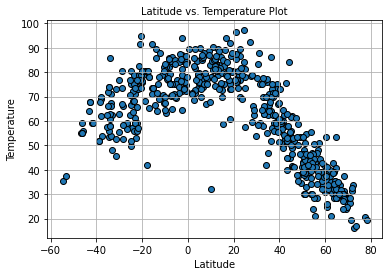

In [11]:
plt.scatter(city_df['Lat'],city_df['Max Temp'],marker='o',edgecolors='black')
plt.grid()
plt.title('Latitude vs. Temperature Plot',size=10)
plt.xlabel('Latitude',size=10)
plt.ylabel('Temperature',size=10)
plt.show()

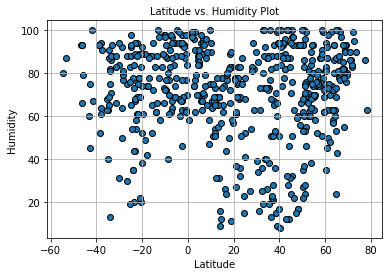

In [13]:
#Latitude vs. Humidity Plot
plt.scatter(city_df['Lat'],city_df['Humidity'],marker='o',edgecolors='black')
plt.grid()
plt.title('Latitude vs. Humidity Plot',size=10)
plt.xlabel('Latitude',size=10)
plt.ylabel('Humidity',size=10)
plt.show()

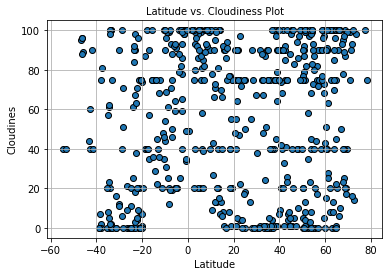

In [14]:
# Latitude vs. Cloudiness Plot
plt.scatter(city_df['Lat'],city_df['Cloudiness'],marker='o',edgecolors='black')
plt.grid()
plt.title('Latitude vs. Cloudiness Plot',size=10)
plt.xlabel('Latitude',size=10)
plt.ylabel('Cloudines',size=10)
plt.show()

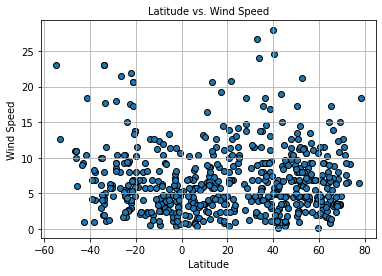

In [15]:
#Latitude vs. Wind Speed Plot
plt.scatter(city_df['Lat'],city_df['Wind Speed'],marker='o',edgecolors='black')
plt.grid()
plt.title('Latitude vs. Wind Speed',size=10)
plt.xlabel('Latitude',size=10)
plt.ylabel('Wind Speed',size=10)
plt.show()

In [19]:
#Creat new hemesfir
north_city = city_df.loc[(city_df['Lat']>5)]
south_city = city_df.loc[(city_df['Lat'] < 5)]

In [20]:

def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

r-squared: -0.9015043317204254


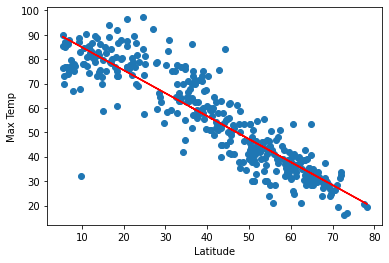

<Figure size 432x288 with 0 Axes>

In [24]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x = north_city['Lat']
y = north_city['Max Temp']
line_regr(x,y,'Max Temp')
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

r-squared: 0.6266880047997405


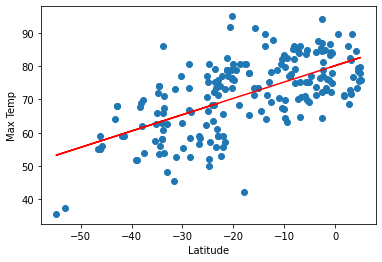

<Figure size 432x288 with 0 Axes>

In [25]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x = south_city['Lat']
y = south_city['Max Temp']
line_regr(x,y,'Max Temp')
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

r-squared: 0.0343036190848496


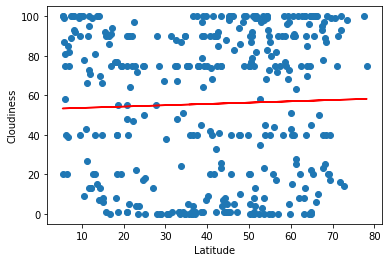

<Figure size 432x288 with 0 Axes>

In [26]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x = north_city['Lat']
y = north_city['Cloudiness']
line_regr(x,y,'Cloudiness')
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

r-squared: 0.36919048143098043


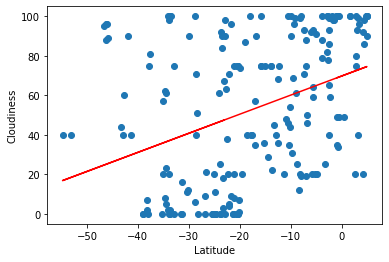

<Figure size 432x288 with 0 Axes>

In [27]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x = south_city['Lat']
y = south_city['Cloudiness']
line_regr(x,y,'Cloudiness')
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

r-squared: 0.0049066191560774445


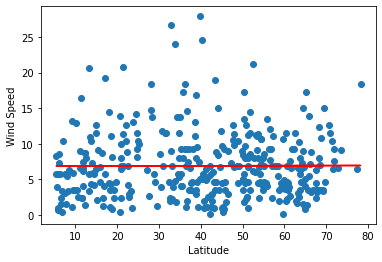

<Figure size 432x288 with 0 Axes>

In [28]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x = north_city['Lat']
y = north_city['Wind Speed']
line_regr(x,y,'Wind Speed')
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

r-squared: -0.32922942309989195


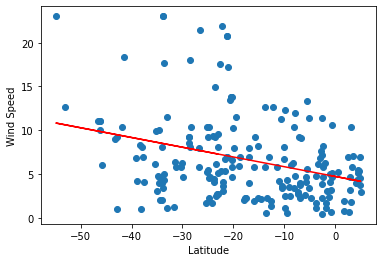

<Figure size 432x288 with 0 Axes>

In [29]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x = south_city['Lat']
y = south_city['Wind Speed']
line_regr(x,y,'Wind Speed')
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

In [ ]:
#Observable trends
#1) In southern Hemisphere the higher the latitude of the city’s it has higher temperature rate.
#2) The Northern Hemisphere has an oposite efect the highr the latitud of the city they have lower temperature rate.
#4)Must of the north hemisphere city has a low wind speed it dosnt depende of the latitud , this means it dosnt have a corelatio